<a href="https://colab.research.google.com/github/davidklhui/data-analysis/blob/main/Regression_Analysis_(1)_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook demonstrate the use of Linear Regression using Python, including the exploratory analysis, model building, model diagnoses, and evaluation


# Introduction

Linear Regression is a statistical model to model the linear relationship between the response and explanatory variables (also called predictors), which is in the relationship:

$$
Y_j = \beta_0 + \sum_{i=1}^{p}\beta_i x_{i,j} + \epsilon_{j}
$$

or in matrix form
$$
Y = X^T \beta + \epsilon
$$

where $Y_j$ is the response of the j rows, $\beta_0, ...\beta_p$ are the unknown parameters, $x_{i,j}$ is the predictor i for the j row; and $\epsilon_j$ is the error.

The goal is to estimate the mean response

$$
\hat{\mu} = E(Y) = X^T \hat{\beta}
$$

There are lots of theory behind Linear Regression like parameter estimate. This notebook will provide how to perform linear regression using Python.

p.s. In the theory of linear regression, normality is not a cruial assumption. However, under central limit theorem, we can make use of the normality assumption for large dataset, and further then we can perform many significance test under this result.

# Procedures

The common procedures for linear regression (and most statistical analysis) are:
1. Exploratory Data Analysis (EDA)
   - to get a basic understanding of each columns of the data
   - graph plotting
2. Data Preparation (Feature Engineering)
   - check if some column may need to perform transformation (like log-transform; standardization; normalization), or create dummy variable for nominal data
   - perform train-test split
3. Model building
   - to build a statistical model that can model the data of interest
4. Model evaluation
   - reperform 2 and 3 to find possible models, and find the "best one" (trade-off between model complexity and evaluation abaility)
5. Diagnostic Analysis
   - check the model adaquency
   - see if there are any assumption violations
6. Predictions
   - using the "best" model found to make prediction


p.s.: there are more advanced techniques like using PCA to perform dimension reduction; variable selection using forward/backward selection based on AIC/BIC; ...
This notebook only perform regular procedures

# Assumptions


The common assumptions for the linear regression are:
1. $E(\epsilon)$ = 0
2. $Var(\epsilon_j)$ = $\sigma^2$, a constant
3. $Cov(\epsilon_i, \epsilon_j)$ = 0 (uncorrelated)

In addition, the data should also have the following properties:
1. response variable are continuous
2. predictors are not exhabiting multicollinearity
3. clear linear relationship between response variable and linear combinations of the predictors


# Perequisites


## Import Libraries

Import commonly used libraries for Linear Regression
there are 2 popular library in the industry:
1. sklearn
2. statsmodels

sklearn is more popular in the data science industry, whereas statsmodels offers more statstics related information. This notebook will use statsmodels to perform regression analysis, but also use sklearn to give some handy functions like train-test split

There are also some common libraries to import, like pandas, numpy, matplotlib, ...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

## Data Source

For this project, we will use the data from Kaggle:
[Medical Cost Personal Datasets](https://www.kaggle.com/datasets/mirichoi0218/insurance)
Data is availiable to download from the author's github

https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv



In [2]:
# retrieve the data using pandas as a Data Frame

data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

# note that the charges is the response variable, and the rest are explanatory variables
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 1. Exploratory Data Analysis (EDA)

EDA usually performs the following tasks:
1. Datatype of each predictors and response, perform transformation if required
2. see if there are any missing data and outliers
3. graph plotting to see if there is linear relationship between response and predictors

In [3]:
# check the summary
data.describe(include='all')


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


from common statistics practice, we do not necessary need to perform normalization / standardization on the response and predictors like in Data Science using Neural Network. However, other types of transformation may be considered like:
1. if they are exhabiting non-linear relationship like exponential / polynomial relationship, then log/square-root transform may be required
2. if the scale of the response is large, then log transform may be required



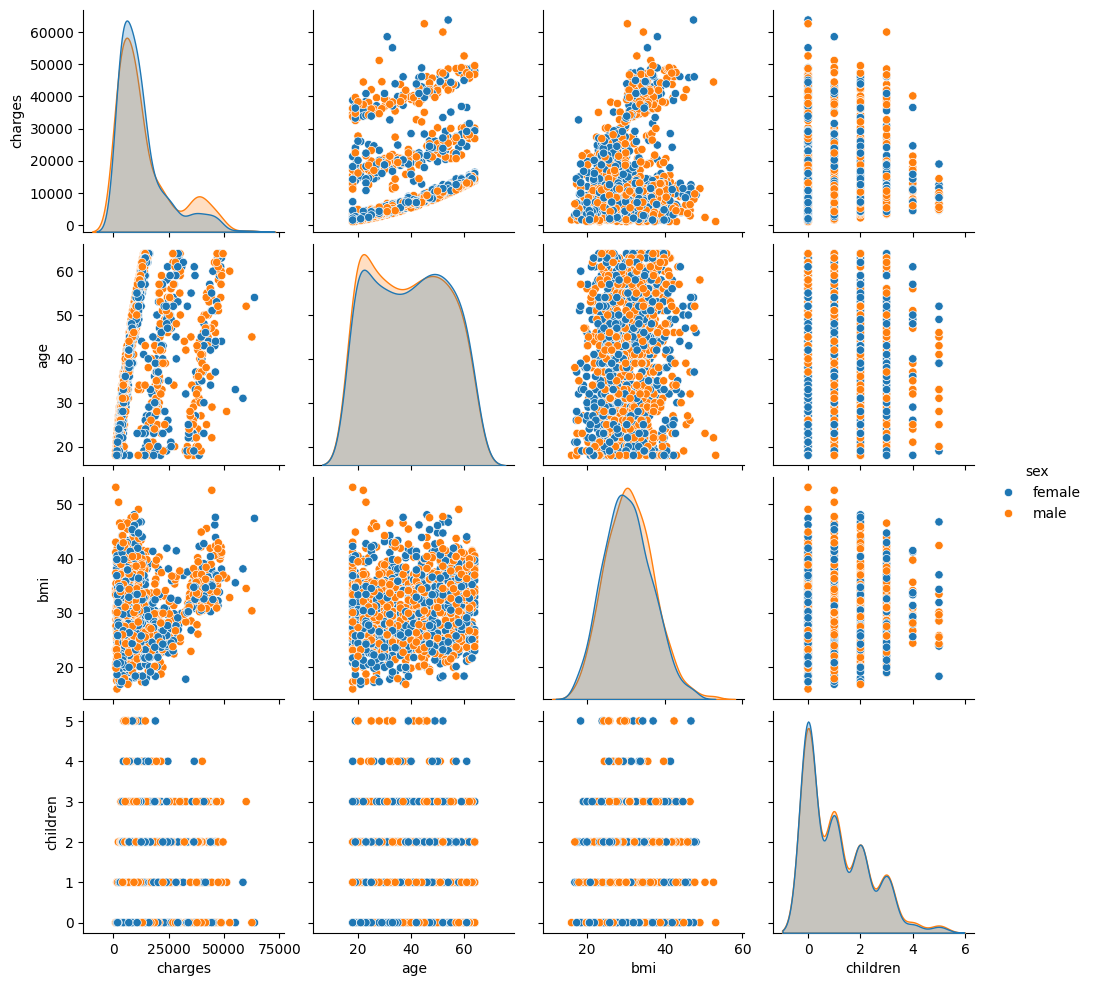

In [5]:
# First take a look at the scatter matrix

sns.pairplot(vars=['charges', 'age', 'bmi', 'children'], data=data, hue='sex')

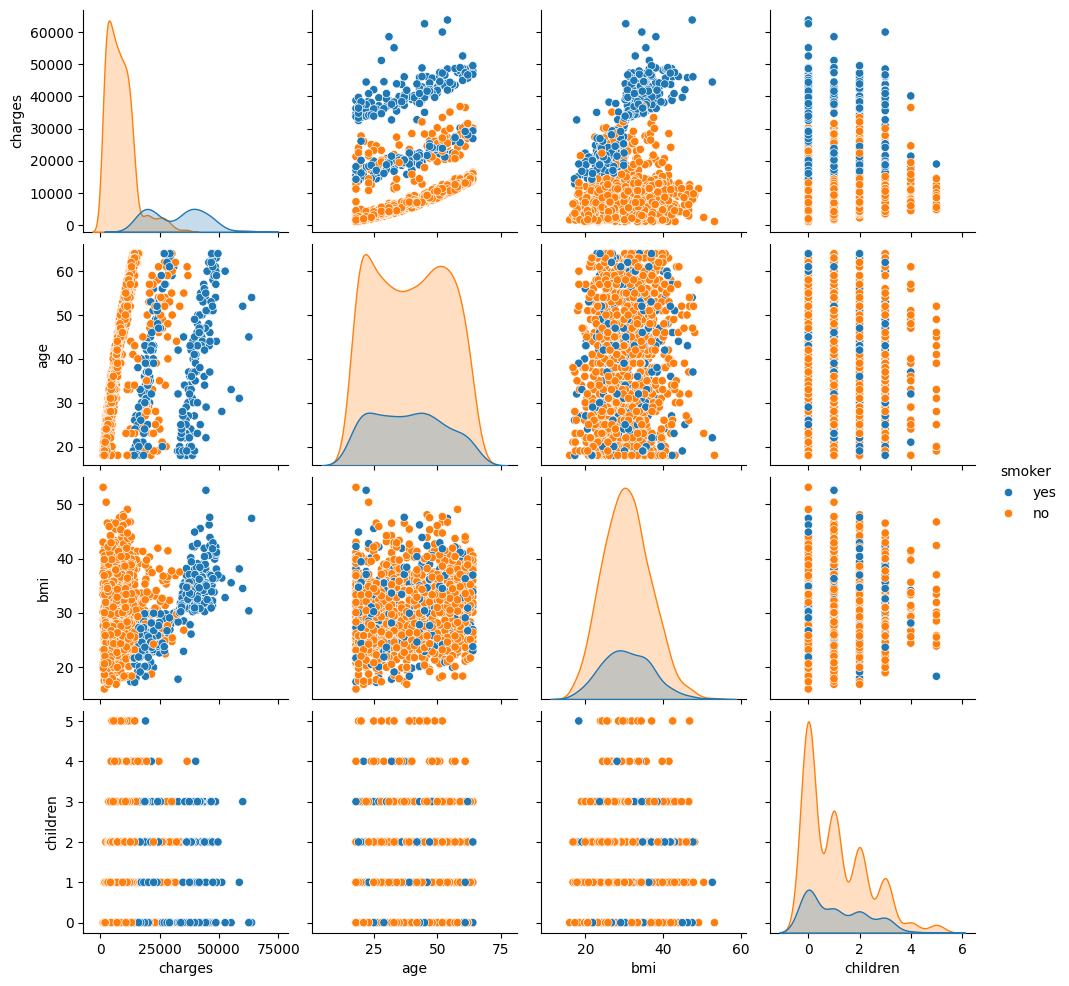

In [6]:
sns.pairplot(vars=['charges', 'age', 'bmi', 'children'], data=data, hue='smoker')

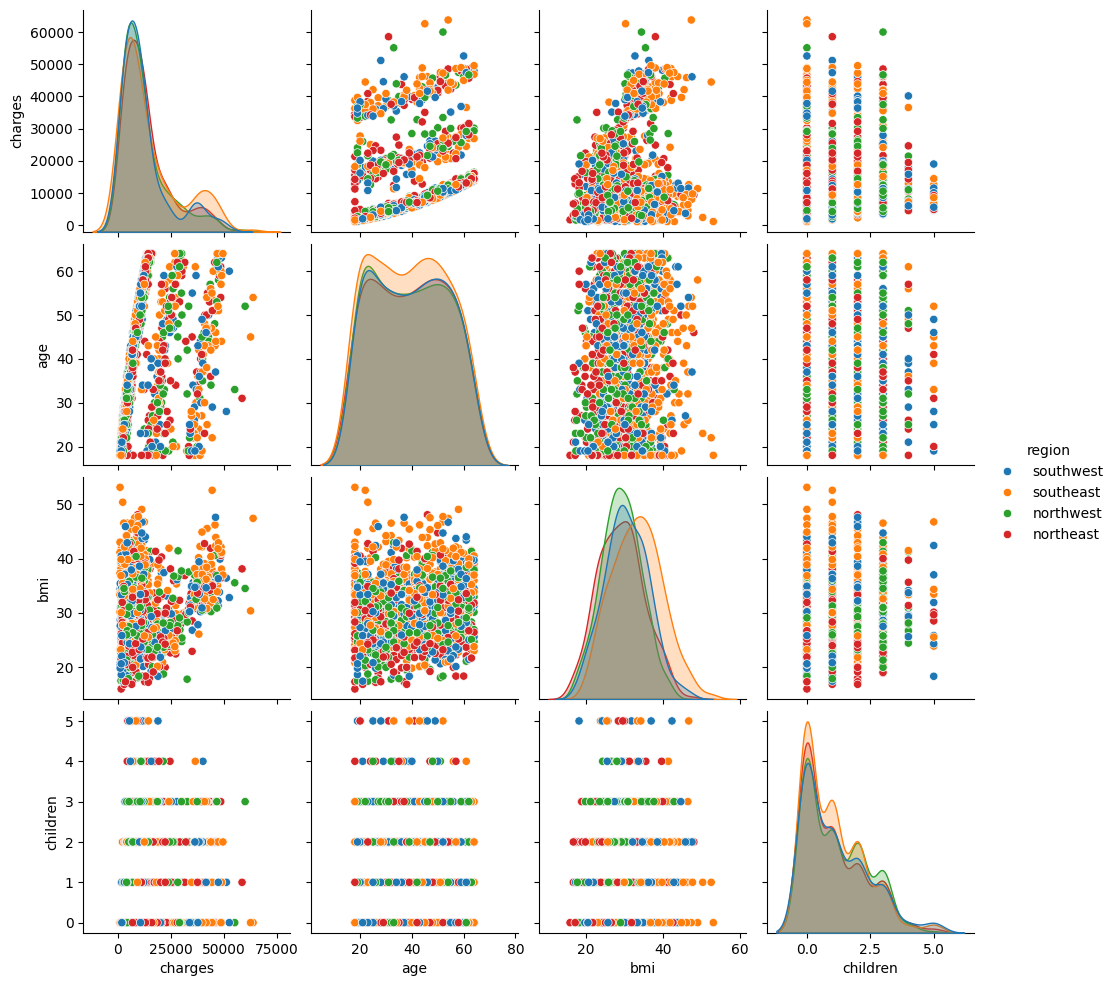

In [7]:
sns.pairplot(vars=['charges', 'age', 'bmi', 'children'], data=data, hue='region')

From the above scatter matrix, we can see that smoker appears an "important" factor for charges, while sex seems not. Either way, we can still try to keep both to the dataset. However, we will ignore the column "region" first. We will consider the region again later.

Further findings are:
1. Charges vs age, bmi appears to have linear relationship by smoke status
2. slope of charges vs bmi appears to have different slope by smoke status, which is a sign of potential interaction


# 2. Data Preparation

Basic feature engineering process, which involved:
1. nominal predictors: to be set of dummy variables
2. continuous predictors: perform transformation if required (like normalization, standardization, log or square root transform)
3. train-test split (or train-validation-test split for most data science tasks).


In [8]:
# from this summary, we can see that columns age, bmi, children, and charges are numeric; whereas sec, smoker, and region are categorical
# since sex, smoker are binary data (male vs female, and yes vs no), we can re-coding them to 0 and 1 using dummy variables
# another options is to use one-hot encoding offered by sklearn.preprocessing

sex_dummy = pd.get_dummies(data['sex'])
smoker_dummy = pd.get_dummies(data['smoker'])
region_dummy = pd.get_dummies(data['region'])

extra_columns_df = pd.concat((sex_dummy, smoker_dummy, region_dummy), axis=1)

print(extra_columns_df)

df = pd.concat((data, extra_columns_df), axis=1)

df.head()

      female  male  no  yes  northeast  northwest  southeast  southwest
0          1     0   0    1          0          0          0          1
1          0     1   1    0          0          0          1          0
2          0     1   1    0          0          0          1          0
3          0     1   1    0          0          1          0          0
4          0     1   1    0          0          1          0          0
...      ...   ...  ..  ...        ...        ...        ...        ...
1333       0     1   1    0          0          1          0          0
1334       1     0   1    0          1          0          0          0
1335       1     0   1    0          0          0          1          0
1336       1     0   1    0          0          0          0          1
1337       1     0   0    1          0          1          0          0

[1338 rows x 8 columns]


,age,sex,bmi,children,smoker,region,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0,0,1,0,0


In [9]:
# perform train-test split
from sklearn.model_selection import train_test_split

y = df['charges']
X = df[['age', 'bmi', 'children', 'female', 'yes']]

X = sm.add_constant(X)

# just for reproducibility, random_state can be ignored
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=123)
y_train.head(), X_train.head()


(1226     6640.54485
 640      6666.24300
 625      3736.46470
 14      39611.75770
 165     10407.08585
 Name: charges, dtype: float64,
       const  age     bmi  children  female  yes
 1226    1.0   38  16.815         2       0    0
 640     1.0   33  42.400         5       0    0
 625     1.0   29  26.030         0       1    0
 14      1.0   27  42.130         0       0    1
 165     1.0   47  28.215         4       0    0)

# 3. Model Building

From the above findings, we may be interested in this relationship:

$$
charges = \beta_0 + \beta_1 age + \beta_2 bmi + \beta_3 children + \beta_4 is\_female + \beta_5 is\_smoker
$$

In statistical model, we write this as:

$$
Y = X^T \beta + \epsilon
$$
with $E(\epsilon)=0, Var(\epsilon)=\sigma^2, Cov(\epsilon_i, \epsilon_j)=0 \ \forall i,j $

Furthermore, we can first assume normality of $\epsilon$ to benefitial from theories developed in statistical inference:
$$
\epsilon \sim N(0, \sigma^2)
$$
We will assess the validitity of this assumption in diagnostic analysis later.

## Test for existence of regression
\begin{align}
H_0 &: \beta_1 = \beta_2 = ... = \beta_p = 0 \\
H_1 &: \exists \ \text{at least one i s.t.} \ \beta_i \ne 0
\end{align}

In [10]:
# perform OLS (ordinary least square)
# there are 2 ways to write the OLS: one is using sm.OLS to supply y and X explicitly; another one is to use smf.ols by using R-like formula


# reduced model
result0 = sm.OLS(y_train, np.ones(y_train.shape[0])).fit()

# full model
result1 = sm.OLS(y_train, X_train).fit()

In [11]:
# summary of reduced model fit

result0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 07 Feb 2024   Prob (F-statistic):                nan
Time:                        17:14:42   Log-Likelihood:                -2900.0
No. Observations:                 267   AIC:                             5802.
Df Residuals:                     266   BIC:                             5806.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.377e+04    773.294     17.810      0.000    1.23e+04    1.53e+04
==============================================================================
Omnibus:                       58.710   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.055
Skew:                           1.350   Prob(JB):                     1.69e-20
Kurtosis:                       3.947   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     149.9
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           1.38e-74
Time:                        17:14:42   Log-Likelihood:                -2719.3
No. Observations:                 267   AIC:                             5451.
Df Residuals:                     261   BIC:                             5472.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.235e+04   2235.751     -5.522      0.000   -1.67e+04   -7942.969
age          254.0420     28.672      8.860      0.000     197.585     310.499
bmi          356.7397     64.101      5.565      0.000     230.518     482.961
children     236.8626    332.630      0.712      0.477    -418.117     891.843
female      -293.8555    799.412     -0.368      0.713   -1867.973    1280.262
yes         2.312e+04    944.415     24.483      0.000    2.13e+04     2.5e+04
==============================================================================
Omnibus:                       53.676   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.299
Skew:                           1.136   Prob(JB):                     1.10e-19
Kurtosis:                       4.639   Cond. No.                         286.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
result1.compare_lr_test(result0)

(361.44218354642726, 6.015944326327102e-76, 5.0)

since the p-value is small (<<< 0.05), we can reject H0 and conclude that there exists a linear relationship between response and predictors

## Sequential Test for significance of each predictor

Sequential Test is a bit tricky to perform then using R anova command, however we may simply using for-loop to deal with this.

Be caution that sequential test is to perform the newly added predictor is significant **given the presense of the other predictors already in the model**

So, it is possible that, sequentially the "useful" predictor is at the end of our test, and we just end up with some insignificant predictors.

In [14]:
# define a function to try looping the predictors, one at a time, and store the fit summary to a list
def sequential_analysis(y, X):
  fit_result = pd.DataFrame(columns=['predictor', 'F-stat', 'p-value', 'df'])
  column_names = list(X.columns.values)

  last_fit = None
  current_fit = None

  # looping the predictors, adding one at a time
  for i in range(1, X.shape[1]+1):
    current_fit = sm.OLS(y, X.iloc[:, 0:i]).fit()

    # to perform likelihood ratio test, we need the current fit and previous fit
    # so if there is no previous fit, set it to current fit; else to perform lr-test
    if last_fit is None:
      last_fit = current_fit
    else:
      predictor_name = column_names[i-1]
      print(predictor_name)

      temp = np.append(predictor_name, current_fit.compare_lr_test(last_fit))
      print(temp)
      fit_result.loc[i-1] = temp
      # after comparison, set the last fit as current fit
      last_fit = current_fit

  return fit_result



In [15]:
sequential_analysis(y_train, X_train)

age
['age' '28.21397476873426' '1.0861750850213065e-07' '1.0']
bmi
['bmi' '12.031274621382181' '0.0005231528920354479' '1.0']
children
['children' '0.48747098504190944' '0.485057614189513' '1.0']
female
['female' '2.2123392095745658' '0.13691093164893617' '1.0']
yes
['yes' '318.49712396169434' '3.0779570221468794e-71' '1.0']


,predictor,F-stat,p-value,df
1,age,28.21397476873426,1.0861750850213065e-07,1.0
2,bmi,12.031274621382181,0.0005231528920354479,1.0
3,children,0.48747098504190944,0.485057614189513,1.0
4,female,2.2123392095745658,0.13691093164893617,1.0
5,yes,318.49712396169434,3.0779570221468794e-71,1.0


Sequentially, we can see that age is significance, and bmi is significance **if age is already in the model**. After that, children is insignificant. and the test ended.

However, we may also try another direction, especially we realized that "smoker" may be a significance predictor in EDA

In [16]:
# after const, age, bmi; test for smoker, then sex, finally children

X_train_rearranged = X_train[['const', 'age', 'bmi', 'yes', 'female', 'children']]
sequential_analysis(y_train, X_train_rearranged)

age
['age' '28.21397476873426' '1.0861750850213065e-07' '1.0']
bmi
['bmi' '12.031274621382181' '0.0005231528920354479' '1.0']
yes
['yes' '320.52539076092125' '1.1129100058332902e-71' '1.0']
female
['female' '0.15331725669966545' '0.6953852134032434' '1.0']
children
['children' '0.5182261386898972' '0.4715993431121621' '1.0']


,predictor,F-stat,p-value,df
1,age,28.21397476873426,1.0861750850213065e-07,1.0
2,bmi,12.031274621382181,0.0005231528920354479,1.0
3,yes,320.52539076092125,1.1129100058332902e-71,1.0
4,female,0.15331725669966545,0.6953852134032434,1.0
5,children,0.5182261386898972,0.4715993431121621,1.0


In [17]:
# or flip children and sex

X_train_rearranged2 = X_train[['const', 'age', 'bmi', 'yes', 'children', 'female']]
sequential_analysis(y_train, X_train_rearranged2)

age
['age' '28.21397476873426' '1.0861750850213065e-07' '1.0']
bmi
['bmi' '12.031274621382181' '0.0005231528920354479' '1.0']
yes
['yes' '320.52539076092125' '1.1129100058332902e-71' '1.0']
children
['children' '0.5333507087043472' '0.4652015485677745' '1.0']
female
['female' '0.13819268668521545' '0.7100843779224353' '1.0']


,predictor,F-stat,p-value,df
1,age,28.21397476873426,1.0861750850213065e-07,1.0
2,bmi,12.031274621382181,0.0005231528920354479,1.0
3,yes,320.52539076092125,1.1129100058332902e-71,1.0
4,children,0.5333507087043472,0.4652015485677745,1.0
5,female,0.13819268668521545,0.7100843779224353,1.0


From this findings, it seemed that the predictors **age**, **bmi**, and **smoker** are the most significant predictors for this model.

Re-fit the model using these 3 predictors

$$
charges = \beta_0 + \beta_1 age + \beta_2 bmi + \beta_3 is\_smoker + \epsilon
$$

In [18]:
X_train_predictors = X_train[['const', 'age', 'bmi', 'yes']]
model1 = sm.OLS(y_train, X_train_predictors).fit()

model1.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     250.9
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           7.62e-77
Time:                        17:14:42   Log-Likelihood:                -2719.6
No. Observations:                 267   AIC:                             5447.
Df Residuals:                     263   BIC:                             5462.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.247e+04   2156.608     -5.781      0.000   -1.67e+04   -8221.638
age          257.0684     28.323      9.076      0.000     201.299     312.838
bmi          360.0978     63.768      5.647      0.000     234.536     485.659
yes         2.317e+04    937.627     24.710      0.000    2.13e+04     2.5e+04
==============================================================================
Omnibus:                       53.566   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.180
Skew:                           1.133   Prob(JB):                     1.17e-19
Kurtosis:                       4.644   Cond. No.                         275.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The fitted summary:

$$
E(charges) = -12470 + 257.068 \ age + 360.098 \ bmi + 23170 \ is\_smoker
$$
with estimate of variance of the model
$\hat{\sigma^2}$ = 1.049109e+10

## Other possible regression model

We may be interest if one is smoker may have some interaction with another predictors. We can try to see how smoker status may make the changes in mean charges

In [19]:
concated_train = pd.concat((y_train, X_train), axis=1)
concated_train_smoke = concated_train[concated_train['yes']==1]
concated_train_nonsmoke = concated_train[concated_train['yes']==0]



In [20]:
model_smoke = smf.ols("charges ~ age + bmi", data=concated_train_smoke).fit()
model_smoke.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     121.3
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           1.24e-21
Time:                        17:14:42   Log-Likelihood:                -617.69
No. Observations:                  62   AIC:                             1241.
Df Residuals:                      59   BIC:                             1248.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.152e+04   3506.534     -6.136      0.000   -2.85e+04   -1.45e+04
age          221.0466     49.415      4.473      0.000     122.167     319.927
bmi         1443.8619    103.418     13.961      0.000    1236.924    1650.800
==============================================================================
Omnibus:                        6.701   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                5.805
Skew:                           0.671   Prob(JB):                       0.0549
Kurtosis:                       3.669   Cond. No.                         267.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
model_nonsmoke = smf.ols("charges ~ age + bmi", data=concated_train_nonsmoke).fit()
model_nonsmoke.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     53.70
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           1.99e-19
Time:                        17:14:42   Log-Likelihood:                -2039.2
No. Observations:                 205   AIC:                             4084.
Df Residuals:                     202   BIC:                             4094.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1337.6453   1957.654     -0.683      0.495   -5197.704    2522.414
age          260.2337     25.229     10.315      0.000     210.489     309.979
bmi           -7.9237     58.109     -0.136      0.892    -122.502     106.654
==============================================================================
Omnibus:                      142.069   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              784.174
Skew:                           2.915   Prob(JB):                    5.23e-171
Kurtosis:                      10.603   Cond. No.                         277.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that, whether smoke or not can significantly change the coefficient value of "bmi". This may be a evidence that, there is a interaction between bmi and smoke status (we can find some insight from the scatter matrix, that charges vs bmi is not parallel by smoke status)

In [22]:
# model2 to include interaction between bmi and smoke status
model2 = smf.ols("charges ~ age + bmi + yes + bmi * yes", data=concated_train).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     338.3
Date:                Wed, 07 Feb 2024   Prob (F-statistic):          3.62e-102
Time:                        17:14:42   Log-Likelihood:                -2657.1
No. Observations:                 267   AIC:                             5324.
Df Residuals:                     262   BIC:                             5342.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1078.2557   1937.684     -0.556      0.578   -4893.672    2737.161
age          251.6987     22.463     11.205      0.000     207.467     295.931
bmi           -5.7695     58.425     -0.099      0.921    -120.812     109.273
yes        -2.128e+04   3632.805     -5.858      0.000   -2.84e+04   -1.41e+04
bmi:yes     1438.8915    115.105     12.501      0.000    1212.243    1665.540
==============================================================================
Omnibus:                      145.518   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              631.430
Skew:                           2.370   Prob(JB):                    7.70e-138
Kurtosis:                       8.856   Cond. No.                         614.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From this summary, we see that the interaction between bmi and smoke status is significant. Although after adding the interaction term makes predictor bmi becomes insignificant, by **the marginality principle**, if interaction terms appears in the model, then the individual predictors should also included into the model.



Here we concluded that there is at least 2 regression models seems to be able to model the data.

model1 is simpler, model2 contains an interaction terms and has smaller AIC and BIC (statistical quantities used to comparing models, smaller means better).

We may have further determinations which one may be better, for example, check which one have lower testing accuracy; model adaquency check; ...



# 4. Model Evaluation

We can use adjusted $R^2$, AIC, BIC, and mean square error for test data, to see which one may behave better on unseen dataset

In [23]:
def eval(model, X, y):

  r2 = model.rsquared
  adjr2 = model.rsquared_adj
  aic = model.aic
  bic = model.bic
  mse = np.mean((model.predict(X) - y)**2)

  return {'r2':r2, 'adjr2': adjr2, 'aic':aic, 'bic':bic, 'mse':mse}





In [24]:
model1_eval = eval(model1, X_test[['const', 'age', 'bmi', 'yes']], y_test)

In [25]:
X_test['bmiyes'] = X_test['bmi'] * X_test['yes']

model2_eval = eval(model2, X_test[['const', 'age', 'bmi', 'yes', 'bmiyes']], y_test)

In [26]:
models_eval = pd.DataFrame([model1_eval, model2_eval])
models_eval.index = ['model1', 'model2']
models_eval

,r2,adjr2,aic,bic,mse
model1,0.741071,0.738117,5447.188205,5461.537200,3.613383e+07
model2,0.837808,0.835332,5324.292319,5342.228563,2.378636e+07


From the evaluation metrics, for model2: adjusted-$\text{R}^2$ is larger; aic and bic are smaller; mse is similar.

These are evidence that model2 can fit the test data better than that of model1

# 5. Diagnostic Analysis

Common diagnostic analysis are:
1. residuals test for normality
   - histogram: we should expect the histogram should look like a normal histogram (a bit fit a bell shape curve)
   - qqplot: the qqplot should fall into a straight line
   - normaltest: a statistical test to test for normality. if the data is normality, the p-value of the test must be small
2. residuals against fitted-values
   - should expect no pattern
3. residuals against each predictors
   - should expect no pattern

we can use model.resid to get residuals; model.fittedvalues to get fitted values

## 1. QQ-Plot for residuals

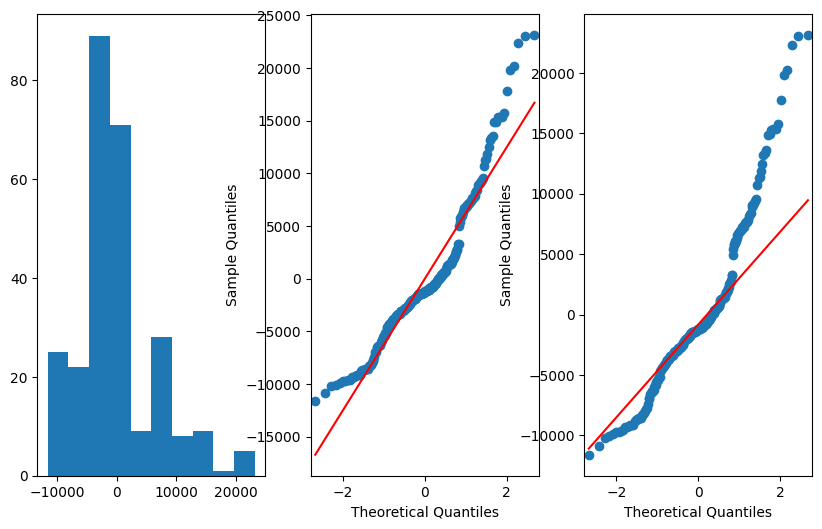

In [27]:

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,6))
ax1.hist(model1.resid)
p = sm.qqplot(model1.resid, line='r', ax=ax2)
p = sm.qqplot(model1.resid, line='q', ax=ax3)



In [28]:
from scipy import stats
normaltest_model1 = stats.normaltest(model1.resid)
print(normaltest_model1.pvalue)

2.335170685749219e-12


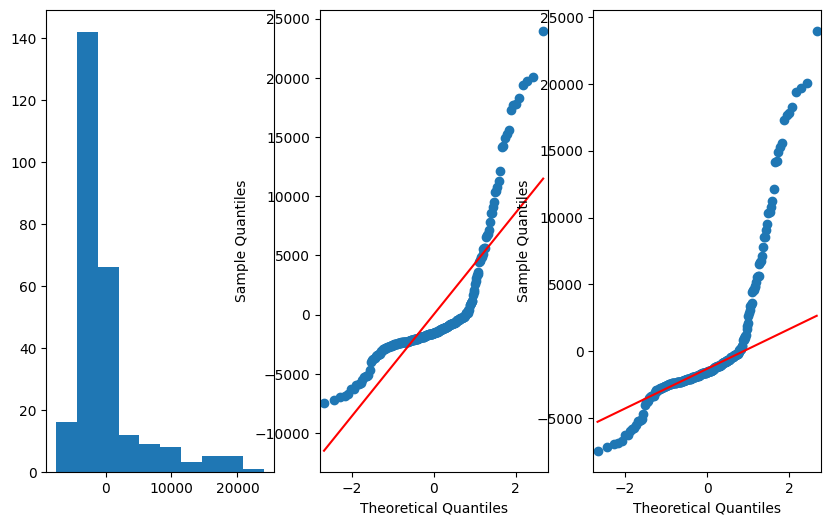

In [29]:

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,6))
ax1.hist(model2.resid)
p = sm.qqplot(model2.resid, line='r', ax=ax2)
p = sm.qqplot(model2.resid, line='q', ax=ax3)


In [30]:
normaltest_model2 = stats.normaltest(model2.resid)
print(normaltest_model2.pvalue)

2.5187977964246186e-32


From the qqplot, residuals for model1 looks satisfying normality, whereas model2 looks not satisfying; using significance test provided by **scipy**, both return p_value <<< 0.05, which indicates that the skewness and kurtosis are not matching that of normal distribution. So both model1 and model2 maybe not satisfying normality. Tt is also supported by the qq-plot.

p.s. We can directly use the summary Jarque-Bera test statistic. If the Prob(JB) is significantly small, than the residuals does not match the skew and kurtosis of normal distribution (for short, the residuals do not follow normal).

## 2. Residuals vs fitted values

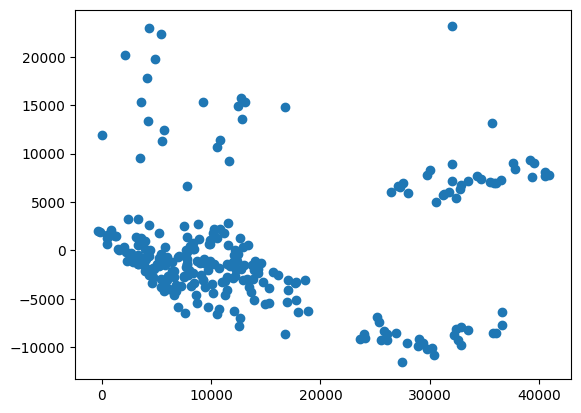

In [31]:
plt.scatter(model1.fittedvalues, model1.resid)

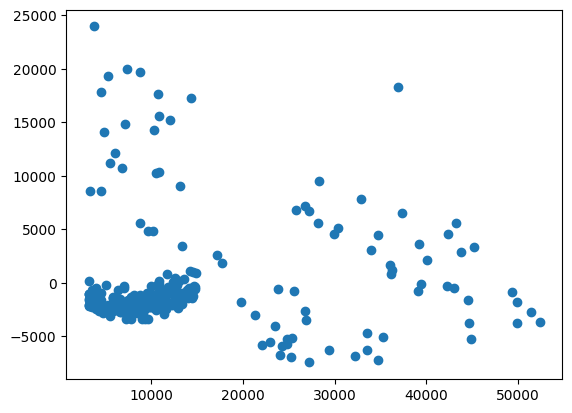

In [32]:
plt.scatter(model2.fittedvalues, model2.resid)

Both not especially well, but both model1 and model2 appears to have a "cluster" around specific region, and some points scattered out

## 3. Residuals against predictors


In [33]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

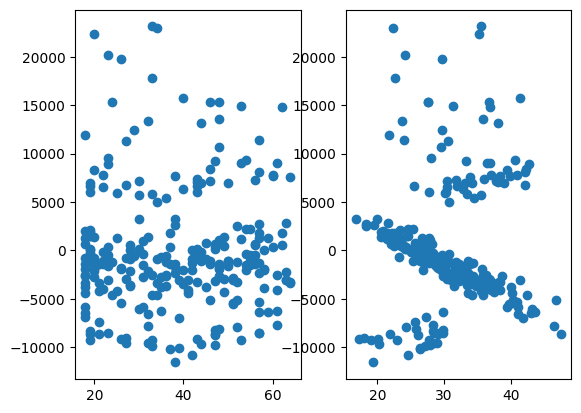

In [34]:
plt.subplot(1,2,1)
plt.scatter(X_train['age'], model1.resid)

plt.subplot(1,2,2)
plt.scatter(X_train['bmi'], model1.resid)



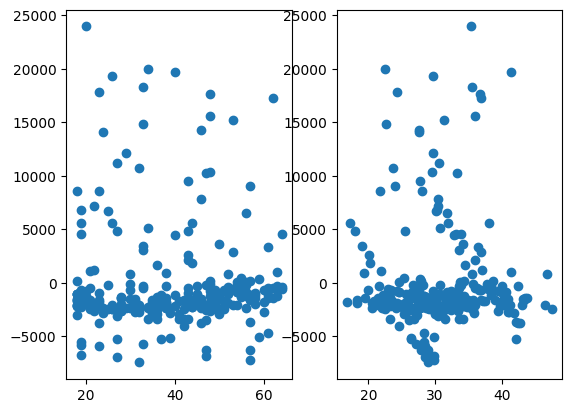

In [35]:
plt.subplot(1,2,1)
plt.scatter(X_train['age'], model2.resid)

plt.subplot(1,2,2)
plt.scatter(X_train['bmi'], model2.resid)


From residuals against predictors plot, it looks like model2 behave better than model1

# 6. Prediction

In general this section is for predicting future unknown labels, however we didn't have these data on hand. We can simply use the test dataset, and assess the model accuracy using mse

In [36]:
X_test['bmiyes'] = X_test['bmi'] * X_test['yes']

test_result = pd.concat((y_test, model1.predict(X_test[['const', 'age', 'bmi', 'yes']]), model2.predict(X_test[['const', 'age', 'bmi', 'yes', 'bmiyes']])), axis=1)
test_result.columns = ['y_true', 'model1_predict', 'model2_predict']

test_result['model1_absolute_error'] = np.abs(test_result['model1_predict'] - test_result['y_true'])
test_result['model2_absolute_error'] = np.abs(test_result['model2_predict'] - test_result['y_true'])

test_result['model1_squared_error'] = (test_result['model1_predict'] - test_result['y_true'])**2
test_result['model2_squared_error'] = (test_result['model2_predict'] - test_result['y_true'])**2


test_result

,y_true,model1_predict,model2_predict,model1_absolute_error,model2_absolute_error,model1_squared_error,model2_squared_error
650,9800.88820,15497.274534,11008.737329,5696.386334,1207.849129,3.244882e+07,1.458900e+06
319,4667.60765,9202.388365,6760.697731,4534.780715,2093.090081,2.056424e+07,4.381026e+06
314,34838.87300,28948.941600,29435.489940,5889.931400,5403.383060,3.469129e+07,2.919655e+07
150,5125.21570,5218.502336,7591.980059,93.286636,2466.764359,8.702396e+03,6.084926e+06
336,12142.57860,12224.970765,13875.158203,82.392165,1732.579603,6.788469e+03,3.001832e+06
...,...,...,...,...,...,...,...
892,10422.91665,10068.593393,12374.803115,354.323257,1951.886465,1.255450e+05,3.809861e+06
526,24059.68019,3431.639044,3527.530164,20628.041146,20532.150026,4.255161e+08,4.215692e+08
445,7345.08400,11019.263926,10057.214437,3674.179926,2712.130437,1.349960e+07,7.355652e+06
943,1628.47090,558.058662,3573.570795,1070.412238,1945.099895,1.145782e+06,3.783414e+06


In [37]:
test_eval = pd.DataFrame(columns=['model_mse', 'test_mse'])
test_eval.loc[0] = [model1.mse_model, np.mean(test_result['model1_squared_error'])]
test_eval.loc[1] = [model2.mse_model, np.mean(test_result['model2_squared_error'])]

test_eval.index = ['model1', 'model2']

test_eval

,model_mse,test_mse
model1,1.049109e+10,3.613383e+07
model2,8.895430e+09,2.378636e+07


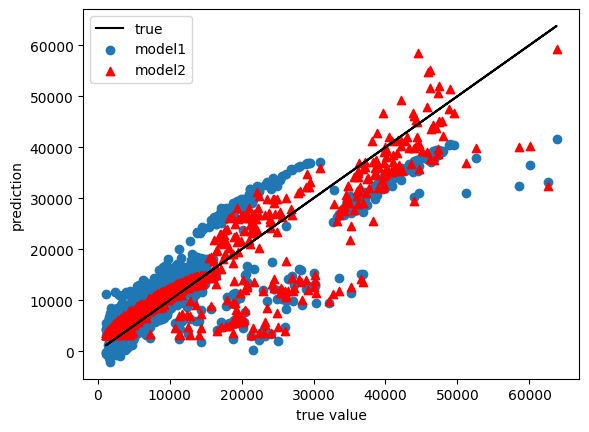

In [48]:
plt.plot(test_result['y_true'], test_result['y_true'], color='black', label='true')

plt.scatter(test_result['y_true'], test_result['model1_predict'], label='model1')
plt.scatter(test_result['y_true'], test_result['model2_predict'], color='red', marker='^', label='model2')

plt.xlabel('true value')
plt.ylabel('prediction')
plt.legend()

plt.show()


We can see that the mse for test dataset is better performance in model2 than model1. Also, the mse for testing is far lower than model mse (the unexplained variability for the model), which is also a sign of good model.

From the plot above, we can see that both model prediction can have predicting ability, and model2 seems better in general.
From 0 to 15000, model1 and model2 are works quite well, with model2 have lower variability from the true.
From 15000 to 30000, both models predicted value look scatter a lot, and show a specific "cluster" below the true-true line.
From 30000 and above, seemed both models tend to underestimate the mean charges.


# Conclusion

In conclusion, we found that the model using age, bmi, smoke, bmi * smoke as explanatory variables are a availiable model to model the dataset.

$$
y = \beta_0 + \beta_1 \ age + \beta_2 \ bmi + \beta_3 \ is\_smoke + \beta_4 \ bmi * is\_smoke + \epsilon
$$

with $\epsilon \sim N(0, \sigma^2)$, where
\begin{align}
\hat{\beta_0} &= -1078.255702 \\
\hat{\beta_1} &= 251.698682 \\
\hat{\beta_2} &= -5.769503 \\
\hat{\beta_3} &= -21282.148592 \\
\hat{\beta_4} &= 1438.891472 \\
\hat{\sigma^2} &= 8895429685.37736
\end{align}

However, there are still many room to improve our model, say
1. further transformation for the response and predictors because the diagnostic plots are not looking perfect
2. detecting outliers, especially we see that in the prediction section, some response seemed incredibly large, that both models cannot capture this. This is also a sign of having extra important predictors that we may be missed
3. identify what predictor may induce the "cluster" shows in true-prediction plot. It maybe another missing signficant predictor that can further improve our model prediction ability


# Further readings


[Latex for Jupyter Notebook](http://chebe163.caltech.edu/2018w/handouts/intro_to_latex.html#:~:text=Insert%20an%20ampersand%20(%20%26%20)%20in,appear%20in%20the%20rendered%20equations)

[Linear Regression using Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

[Statsmodels](https://www.statsmodels.org/stable/index.html)
